In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nycflights13 import flights

In [2]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

Preguntas sencillas ¿Cuántos años tengo en el df y cuántos fueron los vuelos totales?

In [4]:
pd.unique(flights['year'])

array([2013])

Ahora por obvias razones sabemos que todos los vuelos son de ese año, pero si tuviera más años la manera de saber sería agrupay y después contar. Aquí sucede que como cada renglón corresponde a un vuelo, podemos contar el tamaño. En algunos casos tenemos que cada renglón corresponde a más de una o que más de un renglón corresponde solo a 1 obsevación.

In [5]:
vuelos_por_año = flights.groupby('year').size()
vuelos_por_año.head()

year
2013    336776
dtype: int64

Unique se pude usar en todo, por ejemplo los destinos o las salidas.

In [6]:
flights['dest'].unique()

array(['IAH', 'MIA', 'BQN', 'ATL', 'ORD', 'FLL', 'IAD', 'MCO', 'PBI',
       'TPA', 'LAX', 'SFO', 'DFW', 'BOS', 'LAS', 'MSP', 'DTW', 'RSW',
       'SJU', 'PHX', 'BWI', 'CLT', 'BUF', 'DEN', 'SNA', 'MSY', 'SLC',
       'XNA', 'MKE', 'SEA', 'ROC', 'SYR', 'SRQ', 'RDU', 'CMH', 'JAX',
       'CHS', 'MEM', 'PIT', 'SAN', 'DCA', 'CLE', 'STL', 'MYR', 'JAC',
       'MDW', 'HNL', 'BNA', 'AUS', 'BTV', 'PHL', 'STT', 'EGE', 'AVL',
       'PWM', 'IND', 'SAV', 'CAK', 'HOU', 'LGB', 'DAY', 'ALB', 'BDL',
       'MHT', 'MSN', 'GSO', 'CVG', 'BUR', 'RIC', 'GSP', 'GRR', 'MCI',
       'ORF', 'SAT', 'SDF', 'PDX', 'SJC', 'OMA', 'CRW', 'OAK', 'SMF',
       'TUL', 'TYS', 'OKC', 'PVD', 'DSM', 'PSE', 'BHM', 'CAE', 'HDN',
       'BZN', 'MTJ', 'EYW', 'PSP', 'ACK', 'BGR', 'ABQ', 'ILM', 'MVY',
       'SBN', 'LEX', 'CHO', 'TVC', 'ANC', 'LGA'], dtype=object)

Tenemos un montón de destinos, de hecho quiero intentar algo con todas los destinos. Pero seguiremos haciendo pequeñas preguntas.

In [7]:
## Filtremos un destino x
flights_to_MIA = flights[flights['dest']=='MIA']
flights_to_MIA.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
22,2013,1,1,606.0,610,-4.0,858.0,910,-12.0,AA,1895,N633AA,EWR,MIA,152.0,1085,6,10,2013-01-01T11:00:00Z
24,2013,1,1,607.0,607,0.0,858.0,915,-17.0,UA,1077,N53442,EWR,MIA,157.0,1085,6,7,2013-01-01T11:00:00Z
31,2013,1,1,623.0,610,13.0,920.0,915,5.0,AA,1837,N3EMAA,LGA,MIA,153.0,1096,6,10,2013-01-01T11:00:00Z
56,2013,1,1,655.0,700,-5.0,1002.0,1020,-18.0,DL,2003,N997DL,LGA,MIA,161.0,1096,7,0,2013-01-01T12:00:00Z


¿Cuántos vuelos tuvimos a Miami?

In [8]:
len(flights_to_MIA.index)

11728

De todos los destinos. ¿Cuál tuvo más vuelos?

In [9]:
vuelos_por_destino = flights.groupby('dest').size()
vuelos_por_destino.sort_values(ascending=False, inplace = True) ## para que la gráfica no salga tan fea
vuelos_por_destino.head()

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
dtype: int64

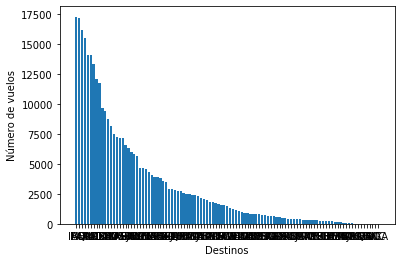

In [10]:

destinos = pd.unique(flights['dest'])

plt.bar(destinos, vuelos_por_destino)
plt.ylabel('Número de vuelos')
plt.xlabel('Destinos')
plt.show()

##### Edit, en este punto me harté de matplolib y encontré una solución más sencilla en sns.

In [11]:
import seaborn as sns

/home/emiliano/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


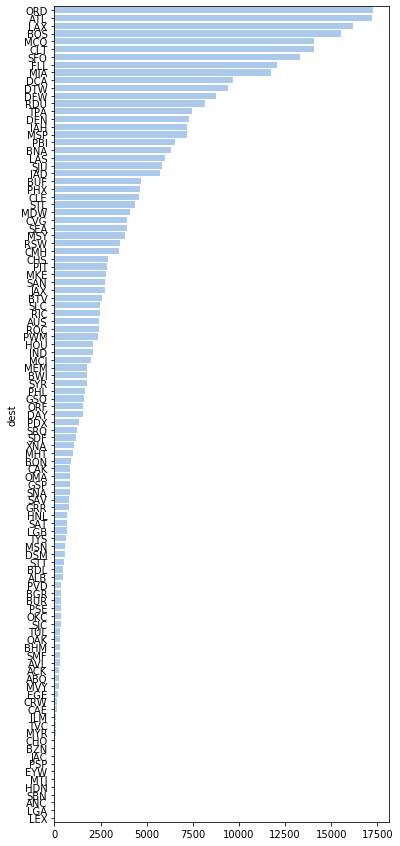

In [12]:
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(vuelos_por_destino.values,vuelos_por_destino.index, 
            label="Total", color="b")
## Meeeh en R lo podría hacer mucho mejor pero así se aprende no?

Pregunta... Cada destino tuvo un origen, quiero saber cuál es el destino más frecuente de cada origen. Evidentemente necesitaré un loop, primero necesito una estrategia para sacar el destino más frecuente de un origen, usaremos el de Miami porque ya lo tenemos

In [13]:
flights_to_MIA.groupby(flights_to_MIA['origin']).size().reset_index(name='counts')

,origin,counts
0,EWR,2633
1,JFK,3314
2,LGA,5781


Lo que tenemos es la cantidad de vuelos que tuvieron como destino Miami por cada destino...
Funcional > POO

In [20]:
s = flights.groupby('dest').agg(most_common_origin=('origin',lambda x : x.mode()[0]),
                              max_count=('origin',lambda x : x.value_counts().sort_values().iloc[-1]),
                              least_common_origin=('origin',lambda x : x.value_counts().sort_values().iloc[[0]].index),
                              min_count=('origin',lambda x : x.value_counts().sort_values().iloc[0]))
s

,most_common_origin,max_count,least_common_origin,min_count
dest,,,,
ABQ,JFK,254,JFK,254
ACK,JFK,265,JFK,265
ALB,EWR,439,EWR,439
ANC,EWR,8,EWR,8
ATL,LGA,10263,JFK,1930
...,...,...,...,...
TPA,JFK,2987,LGA,2145
TUL,EWR,315,EWR,315
TVC,LGA,77,EWR,24
